<a href="https://colab.research.google.com/github/devreborges/Estudos-em-Python/blob/main/Est%C3%A1gio_de_Dados_%26_Insights(LIVE_MODE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando o arquivo e seprando as abas e dividindo os momentos do jogo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
xlsx = pd.ExcelFile('dinamica_data_insights.xlsx')


In [ ]:
# Listar todas as abas disponíveis no arquivo
abas = xlsx.sheet_names

# Criar um dicionário para armazenar os DataFrames de cada aba
dfs = {}

# Loop sobre cada aba, lendo os dados e armazenando em um DataFrame
for aba in abas:
    dfs[aba] = xlsx.parse(aba)

# Agora você pode acessar cada DataFrame individualmente usando o nome da aba como chave no dicionário dfs
df_ao_vivo = dfs['Análise de Audiência Ao Vivo']
df_tiktok = dfs['Análise TikTok']
df_intagram = dfs['Análise Instagram']

# Exibir as primeiras linhas de cada DataFrame para verificar se foram carregados corretamente
print("Primeiras linhas da Aba 1:")
print(df_ao_vivo.head())

print("\nPrimeiras linhas da Aba 2:")
print(df_tiktok.head())

print("\nPrimeiras linhas da Aba 3:")
print(df_intagram.head())


Primeiras linhas da Aba 1:
  Momento da transmissão Minutagem da transmissão  \
0               Pré-Jogo                 00:00:00   
1               Pré-Jogo                 00:01:00   
2               Pré-Jogo                 00:02:00   
3               Pré-Jogo                 00:03:00   
4               Pré-Jogo                 00:04:00   

   Pico de espectadores simultâneos no minuto  Mensagens do chat ao vivo  \
0                                       11703                        111   
1                                       29170                        205   
2                                       37365                        178   
3                                       43515                        182   
4                                       85772                        181   

   Média de espectadores simultâneos no minuto  
0                                         5898  
1                                        26505  
2                                        35446  
3

In [ ]:
#conventendo o tempo para minutos
df_ao_vivo['Minutagem da transmissão'] = range(len(df_ao_vivo))

In [ ]:
# Filtrando as linhas da coluna 'Momento da transmissão' pelos momentos da tansmissão.'
df_pre_jogo = df_ao_vivo[df_ao_vivo['Momento da transmissão'] == 'Pré-Jogo']
df_primeiro_tempo = df_ao_vivo[df_ao_vivo['Momento da transmissão'] == '1º Tempo']
df_intervalo = df_ao_vivo[df_ao_vivo['Momento da transmissão'] == 'Intervalo']
df_segundo_tempo = df_ao_vivo[df_ao_vivo['Momento da transmissão'] == '2º Tempo']
df_pos_jogo = df_ao_vivo[df_ao_vivo['Momento da transmissão'] == 'Pós-Jogo']

# Iniciando a análise pela audiência ao vivo

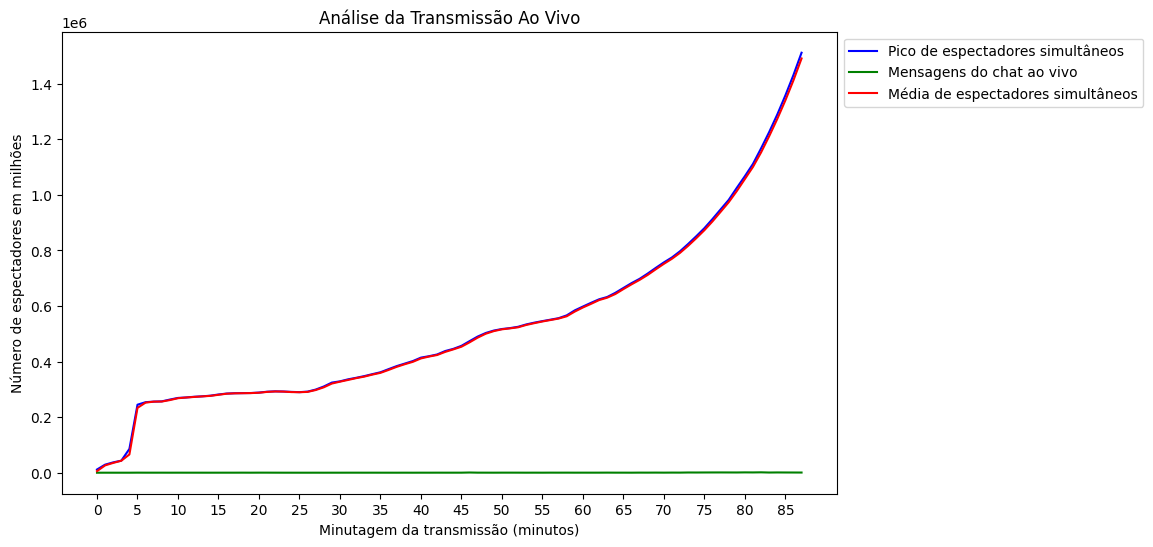

In [ ]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotando as linhas para cada métrica
plt.plot(df_pre_jogo['Minutagem da transmissão'], df_pre_jogo['Pico de espectadores simultâneos no minuto'], color='blue', label='Pico de espectadores simultâneos')
plt.plot(df_pre_jogo['Minutagem da transmissão'], df_pre_jogo['Mensagens do chat ao vivo'], color='green', label='Mensagens do chat ao vivo')
plt.plot(df_pre_jogo['Minutagem da transmissão'], df_pre_jogo['Média de espectadores simultâneos no minuto'], color='red', label='Média de espectadores simultâneos')

# Definindo os rótulos dos eixos x e y e o título do gráfico
plt.xlabel('Minutagem da transmissão (minutos)')
plt.ylabel('Número de espectadores em milhões')
plt.title('Análise da Transmissão Ao Vivo')

# Configurando o intervalo do eixo x para mostrar valores de 5 em 5 minutos
plt.xticks(range(0, len(df_pre_jogo), 5))

# Adicionando a legenda ao gráfico fora da área de plotagem
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibindo o gráfico
plt.show()

**OBS 1**

Ponto 1 - O público que abriu a live é um público fiel, que não abandonou a live no pré jogo, isso por que a média de espectadores simultâneos e o pico de especadores simultâneos é praticamente o mesmo.

Ponto 2 - Após os primeiros 25 minutos da live aberta, o crescimento é exponencial até o inicio do jogo.

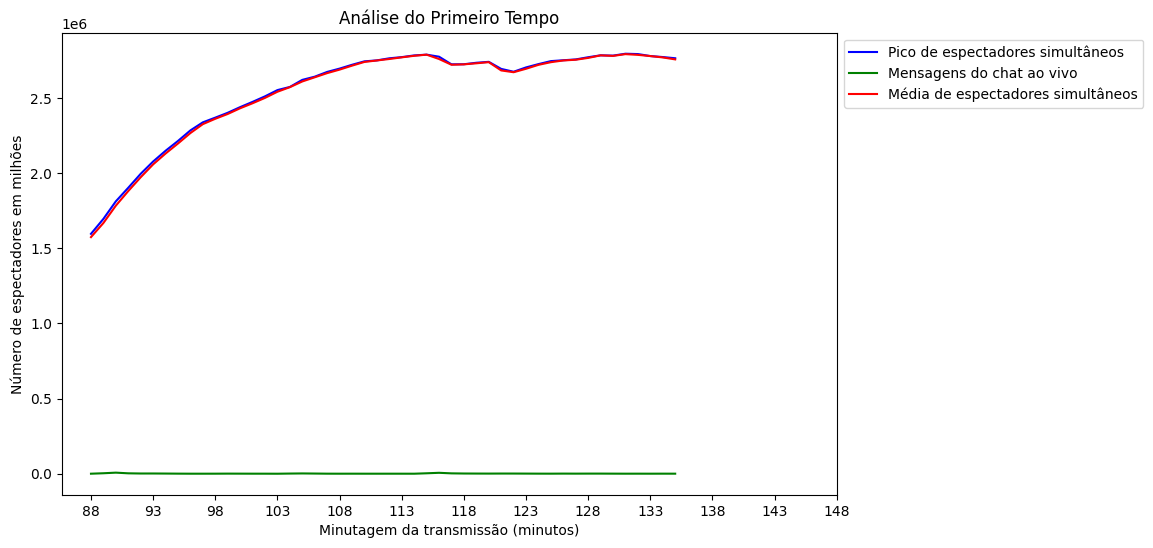

In [ ]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotando as linhas para cada métrica
plt.plot(df_primeiro_tempo['Minutagem da transmissão'], df_primeiro_tempo['Pico de espectadores simultâneos no minuto'], color='blue', label='Pico de espectadores simultâneos')
plt.plot(df_primeiro_tempo['Minutagem da transmissão'], df_primeiro_tempo['Mensagens do chat ao vivo'], color='green', label='Mensagens do chat ao vivo')
plt.plot(df_primeiro_tempo['Minutagem da transmissão'], df_primeiro_tempo['Média de espectadores simultâneos no minuto'], color='red', label='Média de espectadores simultâneos')

# Definindo os rótulos dos eixos x e y e o título do gráfico
plt.xlabel('Minutagem da transmissão (minutos)')
plt.ylabel('Número de espectadores em milhões')
plt.title('Análise do Primeiro Tempo')

# Configurando o intervalo do eixo x para começar em 88 e mostrar valores de 5 em 5 minutos
plt.xticks(range(88, 150, 5))

# Adicionando a legenda ao gráfico fora da área de plotagem
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibindo o gráfico
plt.show()


**OBS 2**

No primeiro tempo da partida o crescimento se comportou de maneira logarítmica, tendo o seu pico no intervalo de 108minutos até 138minutos de transmissão.

Considere esse período como momento ideal para publicidade, tenha em mente que é nesse trecho que você conta com o climáx da primeira etapa da transmisão.

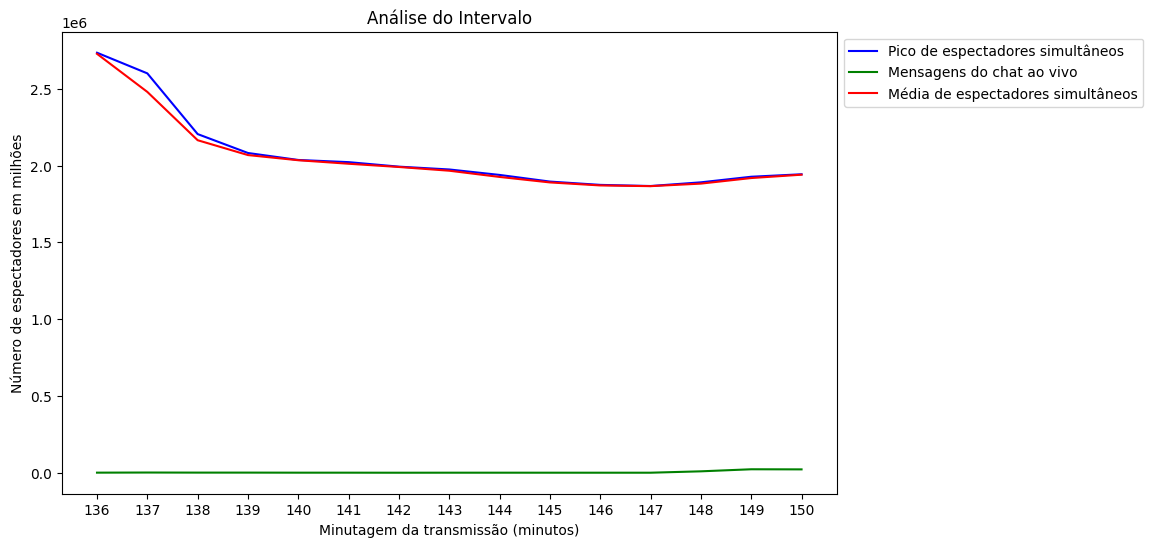

In [ ]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotando as linhas para cada métrica
plt.plot(df_intervalo['Minutagem da transmissão'], df_intervalo['Pico de espectadores simultâneos no minuto'], color='blue', label='Pico de espectadores simultâneos')
plt.plot(df_intervalo['Minutagem da transmissão'], df_intervalo['Mensagens do chat ao vivo'], color='green', label='Mensagens do chat ao vivo')
plt.plot(df_intervalo['Minutagem da transmissão'], df_intervalo['Média de espectadores simultâneos no minuto'], color='red', label='Média de espectadores simultâneos')

# Definindo os rótulos dos eixos x e y e o título do gráfico
plt.xlabel('Minutagem da transmissão (minutos)')
plt.ylabel('Número de espectadores em milhões')
plt.title('Análise do Intervalo')

# Configurando o intervalo do eixo x para mostrar valores de 5 em 5 minutos a partir de 136
plt.xticks(range(136, 136 + len(df_intervalo), 1))

# Adicionando a legenda ao gráfico fora da área de plotagem
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibindo o gráfico
plt.show()


**OBS 3**

Nos primeiros minutos do intervalo, a queda do número de espectadores cai em em aproximadamente 25%.

É possível que esse comportamento seja um padrão do nicho dos esportes, visto que parte dos espectadores podem usar esse tempo para ir ao banheiro, beber água ou assistir outro programa nesse período.

Considere a possíbilidade do ínicio do intervalo para divulgar promoções e oferecer prêmios aos espectadores de modo a manter o máximo de retenção nesse período.


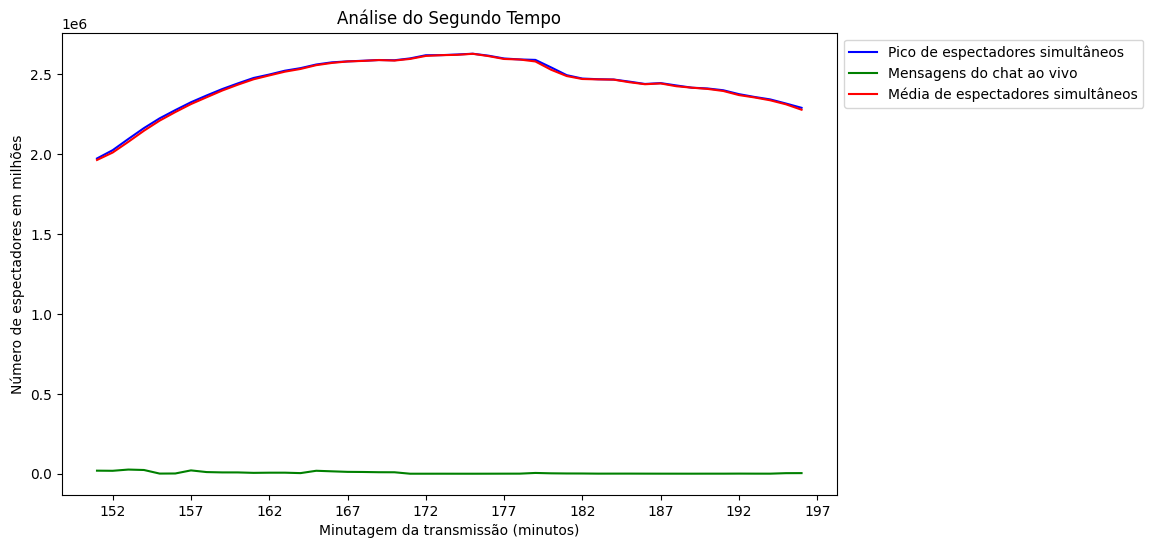

In [ ]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotando as linhas para cada métrica
plt.plot(df_segundo_tempo['Minutagem da transmissão'], df_segundo_tempo['Pico de espectadores simultâneos no minuto'], color='blue', label='Pico de espectadores simultâneos')
plt.plot(df_segundo_tempo['Minutagem da transmissão'], df_segundo_tempo['Mensagens do chat ao vivo'], color='green', label='Mensagens do chat ao vivo')
plt.plot(df_segundo_tempo['Minutagem da transmissão'], df_segundo_tempo['Média de espectadores simultâneos no minuto'], color='red', label='Média de espectadores simultâneos')

# Definindo os rótulos dos eixos x e y e o título do gráfico
plt.xlabel('Minutagem da transmissão (minutos)')
plt.ylabel('Número de espectadores em milhões')
plt.title('Análise do Segundo Tempo')

# Configurando o intervalo do eixo x para mostrar valores de 5 em 5 minutos a partir de 152
plt.xticks(range(152, 152 + len(df_segundo_tempo), 5))

# Adicionando a legenda ao gráfico fora da área de plotagem
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibindo o gráfico
plt.show()


**OBS 4**

Cerca de aproximadamente 70% dos especadores que deixam a live no intervalo retornam para a live em aproximadamente 10 minutos do 2º tempo totalizando aproximadamente 94% dos especptadores no período de maior audiência até aproximandamente os últimos 10 minutos de partida.

Nos últimos 10 minutos de partida a live segue com cerca de 90% da retenção do momento de maior audiência.

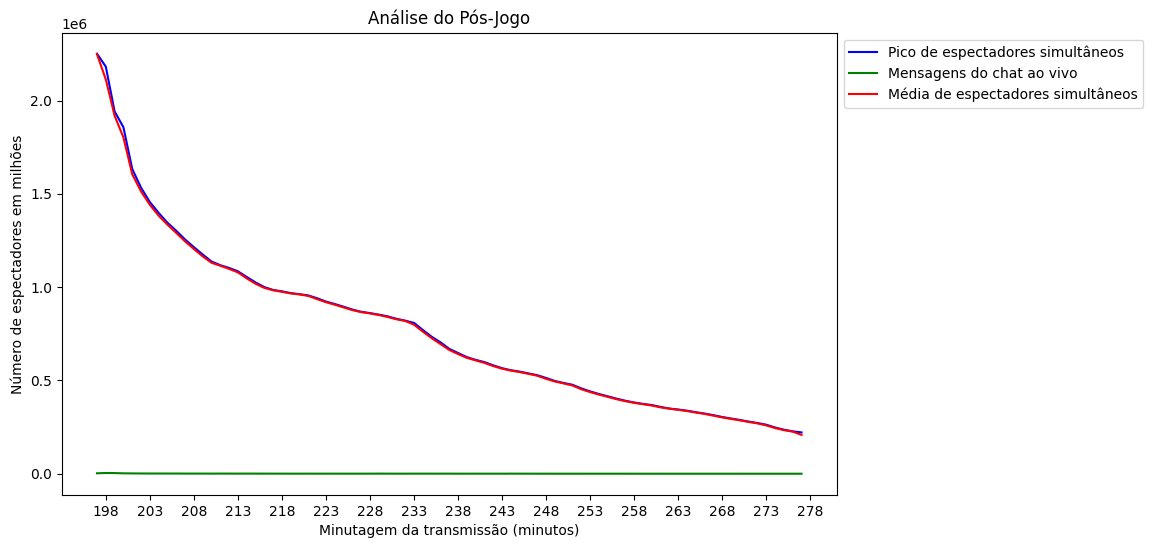

In [ ]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotando as linhas para cada métrica
plt.plot(df_pos_jogo['Minutagem da transmissão'], df_pos_jogo['Pico de espectadores simultâneos no minuto'], color='blue', label='Pico de espectadores simultâneos')
plt.plot(df_pos_jogo['Minutagem da transmissão'], df_pos_jogo['Mensagens do chat ao vivo'], color='green', label='Mensagens do chat ao vivo')
plt.plot(df_pos_jogo['Minutagem da transmissão'], df_pos_jogo['Média de espectadores simultâneos no minuto'], color='red', label='Média de espectadores simultâneos')

# Definindo os rótulos dos eixos x e y e o título do gráfico
plt.xlabel('Minutagem da transmissão (minutos)')
plt.ylabel('Número de espectadores em milhões')
plt.title('Análise do Pós-Jogo')

# Configurando o intervalo do eixo x para mostrar valores de 5 em 5 minutos a partir de 198
plt.xticks(range(198, 198 + len(df_pos_jogo), 5))

# Adicionando a legenda ao gráfico fora da área de plotagem
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibindo o gráfico
plt.show()


**OBS 5**

No pós jogo o descrescimento se comporta de maneira exponencial.

Pode ser uma caractrística do nicho, visto que os espectadores já sabem o resultado do jogo.

Outra possibilidade é o resultado final da partida não ser do agrado da parte majoritária dos espectadore.